**Notebook to plot stability regions**

In [10]:
import sys
sys.path.append("../..")

import matplotlib.pyplot as plt
import numpy as np
import akantu as aka
from tqdm import tqdm

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

max_steps = 2000
time_step = 1e-1

from wobble.rb_coupled import CoupledRB
num_modes=1731
ma=CoupledRB('test', 3, 
             mesh_file='../sample_data_files/mesh_files/beam.msh',
             material_file='../sample_data_files/material_files/steel.dat',
            num_modes=num_modes,
            force_path='../sample_data_files/force_files/no_force.txt',
            timestep=time_step,
            T=25)
ma.set_up()
ma.set_initial_conditions()
ma.handle_forces(eigenmode_path='../sample_data_files/eigenmode_files/rb_modes.csv')

In [11]:
bm = (np.ones((ma.mesh_num_nodes, 3)) * (np.linalg.norm(ma.mesh_nodes-ma.cm, axis=1) * ma.m_lumped).reshape(-1, 1)).flatten()
denom = np.max((ma.eigenvectors @ ((ma.eigenvectors.T @ bm ) / ma.eigenvalues)) )

1.1914017375412476 59570.086877062386


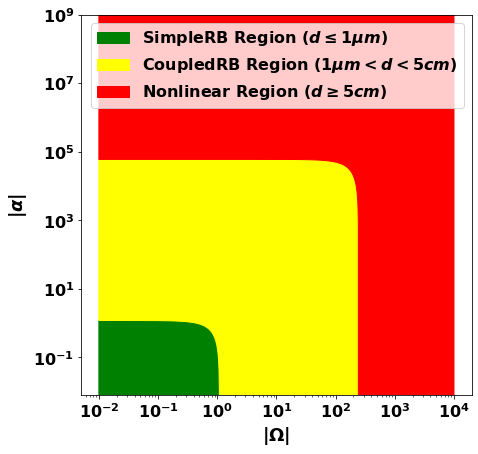

In [6]:
d1=5*10**-2 #1% of largest dimension
d2=10**-6

x = np.logspace(-2, 4, 1000)
K1 = d2/denom
K2 = d1/denom
y1 = K1 - x**2
y2 = K2 - x**2

print(K1, K2)

fig,ax=plt.subplots(figsize=(7,7))
ax.fill_between(x, y1, color='green', label=r"SimpleRB Region ($d\leq 1 \mu m$)")
ax.fill_between(x, y1, y2, color='yellow', label=r"CoupledRB Region ($1 \mu m<d<5cm$)")
ax.fill_between(x, y2, K2*100000, color='red', label=r"Nonlinear Region ($d\geq5cm$)")
ax.set_xscale('log')
ax.set_yscale('log')

plt.legend()
plt.ylim(10**-2.1,10**9)
ax.set_ylabel(r'$|\alpha|$')
ax.set_xlabel(r'$|\Omega|$')
#fig.savefig('neglection_region.png', bbox_inches='tight')
plt.show()

1.1914017375412476 59570.086877062386


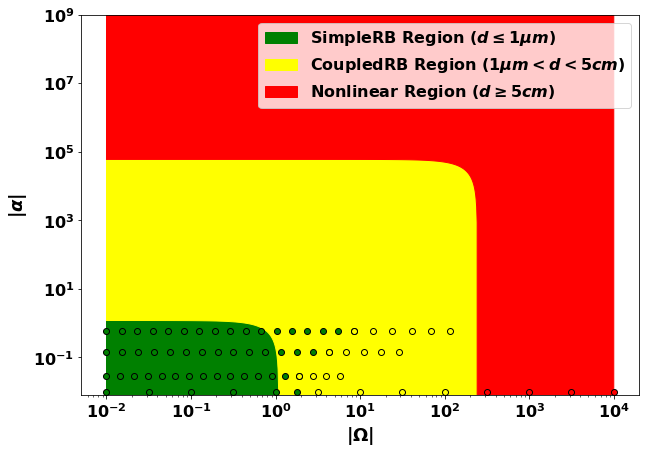

In [8]:
d1=5*10**-2 #1% of largest dimension
d2=10**-6

x = np.logspace(-2, 4, 1000)
K1 = d2/denom
K2 = d1/denom
y1 = K1 - x**2
y2 = K2 - x**2

print(K1, K2)

fig,ax=plt.subplots(figsize=(10,7))
ax.fill_between(x, y1, color='green', label=r"SimpleRB Region ($d\leq 1 \mu m$)")
ax.fill_between(x, y1, y2, color='yellow', label=r"CoupledRB Region ($1 \mu m<d<5cm$)")
ax.fill_between(x, y2, K2*100000, color='red', label=r"Nonlinear Region ($d\geq5cm$)")
ax.set_xscale('log')
ax.set_yscale('log')

#alpha=0 line
ax.scatter(10**np.arange(-2, 0.5, 0.5), [10**-2]*5, c='green', edgecolors='black')
ax.scatter(10**np.arange(0.5, 2.5, 0.5), [10**-2]*4, c='yellow', edgecolors='black')
ax.scatter(10**np.arange(2.5, 4.5, 0.5), [10**-2]*4, c='red', edgecolors='black')
ax.scatter(10**0.25, [10**-2], c='green', edgecolors='black')

#alpha=0.03
ax.scatter([np.logspace(-2, np.log10(1.8980769446575865), 15)], [0.028846183250150717]*15, c='green', edgecolors= 'black')
ax.scatter([np.logspace(np.log10(1.8980769446575865), np.log10(5.769236650030144), 4)], [0.028846183250150717]*4, c='yellow', edgecolors= 'black')

#alpha=0.14
ax.scatter([np.logspace(-2, np.log10(4.225961541457725), 15)], [0.14423444938401406]*15, c='green', edgecolors= 'black')
ax.scatter([np.logspace(np.log10(4.225961541457725), np.log10(28.846889876802813), 5)], [0.14423444938401406]*5, c='yellow', edgecolors= 'black')

#alpha=0.58
ax.scatter([np.logspace(-2, np.log10(8.423076578513284), 17)], [0.5771580754776648]*17, c='green', edgecolors= 'black')
ax.scatter([np.logspace(np.log10(8.423076578513284), np.log10(115.43161509553296), 6)], [0.5771580754776648]*6, c='yellow', edgecolors= 'black')

plt.legend()

ax.set_ylabel(r'$|\alpha|$')
ax.set_xlabel(r'$|\Omega|$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.ylim(10**-2.1,10**9)
#fig.savefig('neglection_region_verification.png', bbox_inches='tight')
plt.show()